# Data Analysis

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
%matplotlib inline

### 1. Preparations

The following code creates the folder for the output tables and figures. We either read the training file or the complete dataset.

In [2]:
outdir = "../data_analysis"
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [3]:
#df = pd.read_csv("../data/train.tsv", sep="\t")
#dataset = "train"
df = pd.read_csv("../data/all.tsv", sep="\t")
dataset = "all"
df['class_tertiary'] = df['class_tertiary'].map({0: "FALSE", 1: "UNCERTAIN", 2:"TRUE"})
df['class_binary'] = df['class_binary'].map({0: "FALSE", 1: "TRUE"})

### 1. Create tables

In [4]:
# Summary of scores annotated per semantic role label
roles = df.groupby(['role_label'])['label']
summary = roles.describe()
csv_file = os.path.join(outdir, f"{dataset}_statistics_scores.csv")
latex_file = os.path.join(outdir, f"{dataset}_latex_statistics_scores.tex")
summary[["count", "mean", "std", "min", "max"]].round(2).to_latex(latex_file)
summary.to_csv(csv_file)
summary

,count,mean,std,min,25%,50%,75%,max
role_label,,,,,,,,
ARG0,392.0,4.073980,1.035007,0.0,4.00,4.0,5.00,5.0
ARG1,520.0,4.551923,0.978180,0.0,4.00,5.0,5.00,5.0
ARG2,95.0,4.400000,1.316022,0.0,4.50,5.0,5.00,5.0
ARG3,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
ARG4,5.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
ARGM-ADV,101.0,2.405941,1.733079,0.0,1.00,2.0,4.00,5.0
ARGM-CAU,13.0,2.461538,1.983910,0.0,1.00,2.0,5.00,5.0
ARGM-DIR,11.0,2.000000,2.408319,0.0,0.00,1.0,5.00,5.0
ARGM-EXT,12.0,3.750000,1.602555,1.0,2.75,4.5,5.00,5.0


In [5]:
# Frequency of classes (tertiary) per semantic role
df_count_tertiary = pd.DataFrame()
roles = df.groupby(['role_label', 'class_tertiary']).size().reset_index(name='size')
dict_roles = roles.to_dict("records")
for group in dict_roles:
    df_count_tertiary.set_value(group["role_label"], group['class_tertiary'], group["size"])
df_count_tertiary.fillna("-", inplace=True)
csv_file = os.path.join(outdir, f"{dataset}_statistics_classes_tertiary.csv")
latex_file = os.path.join(outdir, f"{dataset}_latex_statistics_classes_tertiary.tex")
df_count_tertiary.to_csv(csv_file)
df_count_tertiary.to_latex(latex_file)
df_count_tertiary

,FALSE,TRUE,UNCERTAIN
ARG0,20,322.0,50
ARG1,17,473.0,30
ARG2,8,83.0,4
ARG3,-,2.0,-
ARG4,-,5.0,-
ARGM-ADV,42,32.0,27
ARGM-CAU,6,4.0,3
ARGM-DIR,7,4.0,-
ARGM-EXT,2,8.0,2
ARGM-LOC,4,14.0,3


In [6]:
# Frequency of classes (binary) per semantic role
df_count_binary = pd.DataFrame()
roles = df.groupby(['role_label', 'class_binary']).size().reset_index(name='size')
dict_roles = roles.to_dict("records")
for group in dict_roles:
    df_count_binary.set_value(group["role_label"], group['class_binary'], group["size"])
df_count_binary.fillna("-", inplace=True)
csv_file = os.path.join(outdir, f"{dataset}_statistics_classes_binary.csv")
latex_file = os.path.join(outdir, f"{dataset}_latex_statistics_classes_binary.tex")
df_count_tertiary.to_csv(csv_file)
df_count_tertiary.to_latex(latex_file)
df_count_binary

,FALSE,TRUE
ARG0,29,363.0
ARG1,31,489.0
ARG2,9,86.0
ARG3,-,2.0
ARG4,-,5.0
ARGM-ADV,56,45.0
ARGM-CAU,7,6.0
ARGM-DIR,7,4.0
ARGM-EXT,3,9.0
ARGM-LOC,5,16.0


### 2. Create plots

In [7]:
# Settings seaborn
sns.set(color_codes=False)
sns.set_style("whitegrid")
np.random.seed(sum(map(ord, "distributions")))

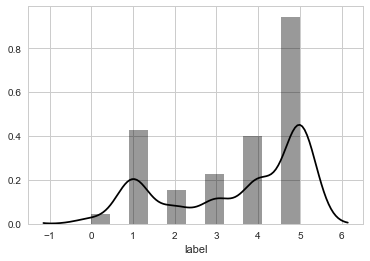

In [8]:
# Plot distribution of scores
scores = df["label"]
sns_plot = sns.distplot(scores, color="black")
fig = sns_plot.get_figure()
fig_file = os.path.join(outdir, f"{dataset}_plot_distribution_scores.pdf")
fig.savefig(fig_file)

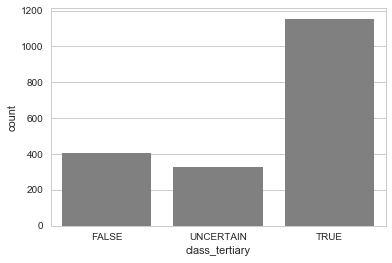

In [9]:
# Plot frequency of tertiary classes
scores = df["class_tertiary"]
sns_plot = sns.countplot(x="class_tertiary", data=df, color="grey", order=["FALSE", "UNCERTAIN", "TRUE"])
fig = sns_plot.get_figure()
fig_file = os.path.join(outdir, f"{dataset}_plot_frequency_tertiary_classes.pdf")
fig.savefig(fig_file)

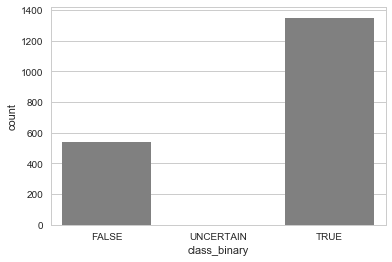

In [10]:
# Plot frequency of tertiary classes
scores = df["class_binary"]
sns_plot = sns.countplot(x="class_binary", data=df, color="grey", order=["FALSE", "UNCERTAIN", "TRUE"])
fig = sns_plot.get_figure()
fig_file = os.path.join(outdir, f"{dataset}_plot_frequency_binary_classes.pdf")
fig.savefig(fig_file)